### Business Problem :

### Output variable -> y
### y -> Whether the client has subscribed a term deposit or not 
### Binomial ("yes" or "no")


---------------------------------------------------------------------
### Import Libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report,roc_curve,roc_auc_score

### Import Data

In [2]:
bank_data = pd.read_csv('bank-full.csv')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Data Understanding

In [5]:
bank_data.shape

(45211, 17)

In [6]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [8]:
bank_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [9]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Understanding Target Variable 

In [10]:
bank_data['y'].unique()

array(['no', 'yes'], dtype=object)

### Data visualization 

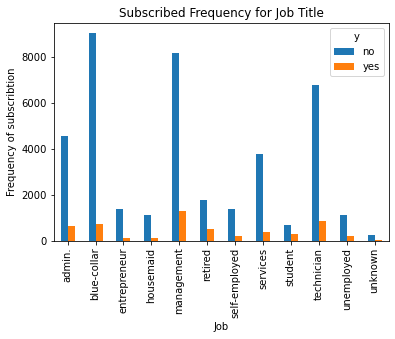

In [11]:
pd.crosstab(bank_data.job,bank_data.y).plot(kind='bar')
plt.title('Subscribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of subscribtion')
plt.show()

### The frequency of subscribtion depends on a great deal on the job title. Thus, the job title can be a good predictor of the target variable. 
----------------------------------------------------------------------------------------------------------------------

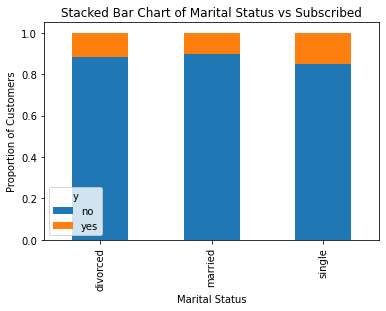

In [12]:
table=pd.crosstab(bank_data.marital,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

### The marital status is a strong predictor for the target variable
-------------------------------------------------------------------------------

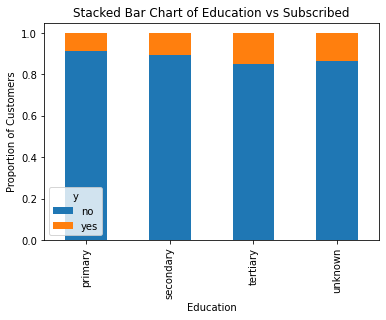

In [13]:
table=pd.crosstab(bank_data.education,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

### Education is a strong predictor for the target variable
-----------------------------------------------------------------

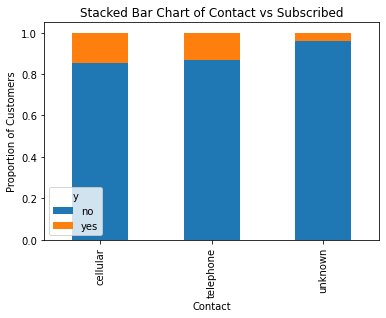

In [14]:
table=pd.crosstab(bank_data.contact,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Contact vs Subscribed')
plt.xlabel('Contact')
plt.ylabel('Proportion of Customers')
plt.show()

### Contact does not seem to be a strong predictor for the target variable
----------------------------------------------------------------------------------

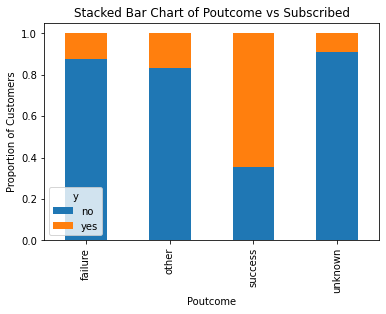

In [15]:
table=pd.crosstab(bank_data.poutcome,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Poutcome vs Subscribed')
plt.xlabel('Poutcome')
plt.ylabel('Proportion of Customers')
plt.show()

### Poutcome does not seem to be a strong predictor for the target variable
--------------------------------------------------------------------------------------

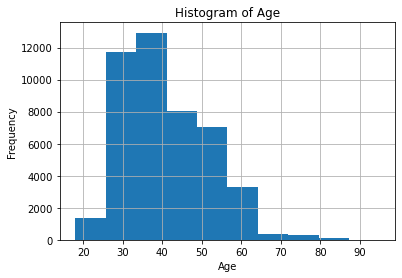

In [16]:
bank_data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Most of the customers are in the age between 20 and 50 years.
----------------------------------------------------------------------------

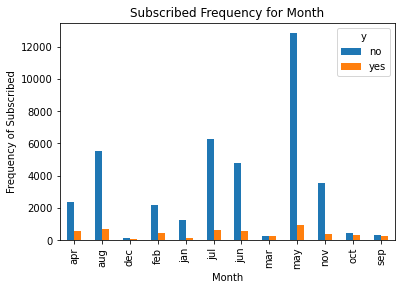

In [17]:
pd.crosstab(bank_data.month,bank_data.y).plot(kind='bar')
plt.title('Subscribed Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subscribed')
plt.show()

### Month might be a good predictor of the target variable
-------------

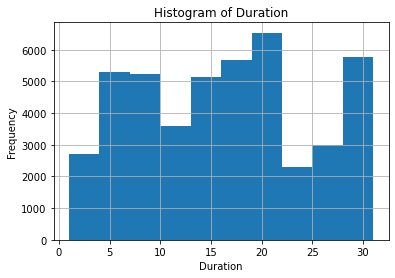

In [18]:
bank_data.day.hist()
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [19]:
bank_data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

### Data is somewhat evenly distributed on 'housing' feature.
-----------------

In [20]:
bank_data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

### Majority of the clients do not have a loan
-----------

### Data Manipulation 

In [21]:
# One-Hot Encoding of categrical variables
bank_data_copy =pd.get_dummies(bank_data,columns=['job','marital','education','contact','poutcome'])
bank_data_copy

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [22]:
pd.set_option('display.max.columns', None)
bank_data_copy

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [23]:
# Custom Binary Encoding of Binary variables 
bank_data_copy['default'] = np.where(bank_data_copy['default'].str.contains("yes"), 1, 0)
bank_data_copy['housing'] = np.where(bank_data_copy['housing'].str.contains("yes"), 1, 0)
bank_data_copy['loan']    = np.where(bank_data_copy['loan'].str.contains("yes"), 1, 0)
bank_data_copy['y']       = np.where(bank_data_copy['y'].str.contains("yes"), 1, 0)
bank_data_copy

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [24]:
# Find and Replace Encoding for month categorical varaible
bank_data_copy['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [25]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [26]:
bank_data_copy = bank_data_copy.replace(order)
bank_data_copy

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [27]:
bank_data_copy.dtypes

age                    int64
default                int32
balance                int64
housing                int32
loan                   int32
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int32
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_failu

In [28]:
count_no = len(bank_data_copy[bank_data_copy['y']==0])
count_yes = len(bank_data_copy[bank_data_copy['y']==1])

In [29]:
(count_yes / (count_yes + count_no))*100

11.698480458295547

### Observation : Percentage of Client Subscribed is 11.69 % in the current dataset
--------------------------------------------------------------------------------------------

### Model Building

In [30]:
# Dividing our data into input and output variables
X=pd.concat([bank_data_copy.iloc[:,0:11],bank_data_copy.iloc[:,12:]],axis=1)
y=bank_data_copy.iloc[:,11]

In [31]:
X.head(5)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [32]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=121212)

In [34]:
X_train.shape,y_train.shape

((36168, 37), (36168,))

In [35]:
X_test.shape,y_test.shape

((9043, 37), (9043,))

### Model Training

In [36]:
log_classifier = LogisticRegression()

In [37]:
log_classifier.fit(X_train,y_train)

LogisticRegression()

In [38]:
print("Intercept value of Log Classifier Model is    : " ,log_classifier.intercept_)
print("Coefficient value of Log Classifier Model is  : " ,log_classifier.coef_)

Intercept value of Log Classifier Model is    :  [-0.17935674]
Coefficient value of Log Classifier Model is  :  [[-3.07002793e-02 -1.10216623e-02  2.25057316e-05 -4.67678604e-01
  -1.20537337e-01 -2.23074507e-02  1.37076131e-02  3.55462439e-03
  -4.42816010e-01 -4.79559277e-04  1.74652820e-01 -1.76077461e-02
  -1.82839622e-01 -1.59289907e-02 -1.59410131e-03  2.55605974e-02
   1.04676241e-01 -7.16674330e-03 -6.45421231e-02  1.97941319e-02
  -4.17691573e-02 -5.48051176e-04  2.61937455e-03  8.78318240e-03
  -1.07582572e-01 -8.05468008e-02 -4.95350927e-02 -1.90665687e-01
   5.10175979e-02  9.83699174e-03  9.14205300e-02  3.34833602e-02
  -3.04250081e-01 -7.57655870e-02 -1.77177560e-02  2.07001950e-01
  -2.92864797e-01]]


### Model Prediction

In [39]:
# Predict for X_train dataset
y_pred_train = log_classifier.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
y_pred_df = pd.DataFrame({'actual_y':y_train,'y_pred_prob':y_pred_train})
y_pred_df

,actual_y,y_pred_prob
43694,1,0
15461,0,0
21957,0,0
36727,0,0
15803,0,0
...,...,...
27261,0,0
32910,0,0
41337,0,0
39044,0,0


### Model Testing 

In [41]:
y_pred_test = log_classifier.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
y_pred = pd.DataFrame({'actual_y':y_test,'y_pred_prob':y_pred_test})
y_pred

,actual_y,y_pred_prob
37413,0,0
20276,0,0
35666,0,0
38820,0,0
9441,1,0
...,...,...
22421,0,0
5282,0,0
6557,0,0
36375,0,0


In [43]:
print('Accuracy of the Logistic Classifier Model      : ', accuracy_score(y_test,y_pred_test))
print('-------------------------------------------------------------------------------------')
print('Confusion Matrix of Logistic Classifier Model  :\n ', confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------------------------------------------')
print('Precision Score of Logistic Classifier Model   : ', precision_score(y_test,y_pred_test))
print('-------------------------------------------------------------------------------------')
print('Recall Score of Logistic Classifier Model      : ', recall_score(y_test,y_pred_test))
print('-------------------------------------------------------------------------------------')
print('Classification Report of Logistic Model        :\n ', classification_report(y_test,y_pred_test))

Accuracy of the Logistic Classifier Model      :  0.8894172287957536
-------------------------------------------------------------------------------------
Confusion Matrix of Logistic Classifier Model  :
  [[7818  171]
 [ 829  225]]
-------------------------------------------------------------------------------------
Precision Score of Logistic Classifier Model   :  0.5681818181818182
-------------------------------------------------------------------------------------
Recall Score of Logistic Classifier Model      :  0.21347248576850095
-------------------------------------------------------------------------------------
Classification Report of Logistic Model        :
                precision    recall  f1-score   support

           0       0.90      0.98      0.94      7989
           1       0.57      0.21      0.31      1054

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.63      9043
weighted avg       0.86      0.89      0.87    

In [44]:
confusion_matrix = confusion_matrix(y_test,y_pred_test)
confusion_matrix

array([[7818,  171],
       [ 829,  225]], dtype=int64)

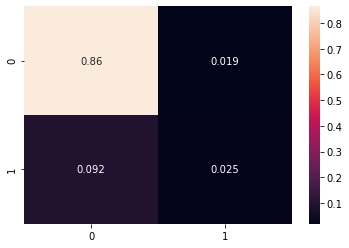

In [45]:
sns.heatmap(data=confusion_matrix/np.sum(confusion_matrix),annot= True)
plt.show()

In [46]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(7818+225)/(7818+171+829+225)

0.8894172287957536

### The accuracy of the logistic model is 88.9 %

In [47]:
# As accuracy = 0.889, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
log_classifier.predict_proba(X)[:,1] 

array([0.07141728, 0.05437823, 0.05180305, ..., 0.46081853, 0.05477514,
       0.62510914])

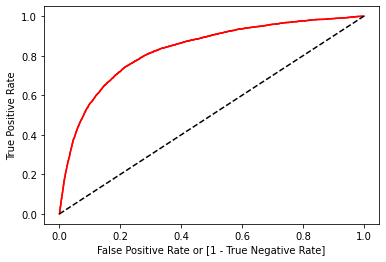

auc accuracy: 0.5960340273378741


In [48]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,log_classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_pred_test)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

### Output Interpretation

1 - Confusion Matrix tells us that we have 7818 + 225 correct predictions and 171 + 821 incorrect predictions.

2 - Accuracy == 88.9% of the entire dataset, so 88.9% of the clients have subscribed a deposit.
